In [1]:
import numpy as np
import pandas as pd
import os
import torch
from torch.utils.data import DataLoader, TensorDataset

In [2]:
current_dir=os.getcwd()

In [3]:
os.chdir(current_dir +'/train/pos')
pos_files=os.listdir()
os.chdir(current_dir+ '/train/neg')
neg_files=os.listdir()

In [4]:
pos_files[:5]

['0_9.txt', '10000_8.txt', '10001_10.txt', '10002_7.txt', '10003_8.txt']

In [5]:
neg_files[:5]

['0_3.txt', '10000_4.txt', '10001_4.txt', '10002_1.txt', '10003_1.txt']

In [6]:
os.chdir(current_dir +'/train/pos')
pos_reviews=[]
for file in pos_files:
    with open(file,'r',errors='ignore') as f:
        review=f.read()
        pos_reviews.append(review)

In [7]:
os.chdir(current_dir +'/train/neg')
neg_reviews=[]
for file in neg_files:
    with open(file,'r',errors='ignore') as f:
        review=f.read()
        neg_reviews.append(review)

In [8]:
print(len(pos_reviews))
print(len(neg_reviews))

12500
12500


In [9]:
from string import punctuation

In [10]:
pos_rev=[]
for i in pos_reviews:
    i=''.join([c for c in i if c not in punctuation])
    pos_rev.append(i)

neg_rev=[]
for i in neg_reviews:
    i=''.join([c for c in i if c not in punctuation])
    neg_rev.append(i)

In [11]:
pos_rev[0]

'Bromwell High is a cartoon comedy It ran at the same time as some other programs about school life such as Teachers My 35 years in the teaching profession lead me to believe that Bromwell Highs satire is much closer to reality than is Teachers The scramble to survive financially the insightful students who can see right through their pathetic teachers pomp the pettiness of the whole situation all remind me of the schools I knew and their students When I saw the episode in which a student repeatedly tried to burn down the school I immediately recalled  at  High A classic line INSPECTOR Im here to sack one of your teachers STUDENT Welcome to Bromwell High I expect that many adults of my age think that Bromwell High is far fetched What a pity that it isnt'

In [12]:
neg_rev[0]

'Story of a man who has unnatural feelings for a pig Starts out with a opening scene that is a terrific example of absurd comedy A formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers Unfortunately it stays absurd the WHOLE time with no general narrative eventually making it just too off putting Even those from the era should be turned off The cryptic dialogue would make Shakespeare seem easy to a third grader On a technical level its better than you might think with some good cinematography by future great Vilmos Zsigmond Future stars Sally Kirkland and Frederic Forrest can be seen briefly'

In [13]:
pos_lables=np.ones(12500)
neg_lables=np.zeros(12500)

In [14]:
len(pos_lables)


12500

In [15]:
len(neg_lables)

12500

In [16]:
neg_lables[:5]

array([0., 0., 0., 0., 0.])

In [17]:
pos_lables[:5]

array([1., 1., 1., 1., 1.])

In [18]:
total_reviews=[]

In [19]:
for i in pos_rev:
    total_reviews.append(i)

In [20]:
len(total_reviews)

12500

In [21]:
for i in neg_rev:
    total_reviews.append(i)

In [22]:
len(total_reviews)

25000

In [23]:
lables=[]
for i in pos_lables:
    lables.append(i)
    
for i in neg_lables:
    lables.append(i)

In [24]:
len(lables)

25000

In [25]:
from collections import Counter
all_text = ' '.join(total_reviews)
# create a list of words
words = all_text.split()
# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

In [26]:
print (count_words)

Counter({'the': 288852, 'a': 155842, 'and': 155168, 'of': 143613, 'to': 133346, 'is': 105799, 'in': 86980, 'I': 71059, 'that': 67348, 'it': 64821, 'this': 60205, 'br': 57105, 'was': 47652, 'The': 44349, 'as': 43338, 'with': 42678, 'for': 41847, 'movie': 41194, 'film': 37006, 'but': 34407, 'on': 32396, 'are': 29033, 'his': 27814, 'not': 27555, 'have': 27430, 'you': 26580, 'be': 26421, 'one': 23185, 'he': 21961, 'at': 21686, 'by': 21660, 'all': 20959, 'an': 20734, 'who': 19678, 'from': 19539, 'like': 18876, 'its': 18280, 'they': 18004, 'her': 17371, 'so': 17172, 'about': 17000, 'or': 16950, 'has': 16605, 'just': 16490, 'out': 16130, 'This': 14725, 'some': 14395, 'good': 13927, 'more': 13802, 'very': 13351, 'what': 12117, 'It': 12072, 'up': 12019, 'would': 12010, 'when': 11637, 'which': 11550, 'time': 11502, 'only': 11299, 'really': 11274, 'if': 11250, 'had': 11067, 'were': 11063, 'story': 11055, 'their': 11032, 'even': 10880, 'see': 10853, 'can': 10775, 'no': 10515, 'there': 10383, 'my':

In [27]:
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}

In [28]:
print (vocab_to_int)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'I': 8, 'that': 9, 'it': 10, 'this': 11, 'br': 12, 'was': 13, 'The': 14, 'as': 15, 'with': 16, 'for': 17, 'movie': 18, 'film': 19, 'but': 20, 'on': 21, 'are': 22, 'his': 23, 'not': 24, 'have': 25, 'you': 26, 'be': 27, 'one': 28, 'he': 29, 'at': 30, 'by': 31, 'all': 32, 'an': 33, 'who': 34, 'from': 35, 'like': 36, 'its': 37, 'they': 38, 'her': 39, 'so': 40, 'about': 41, 'or': 42, 'has': 43, 'just': 44, 'out': 45, 'This': 46, 'some': 47, 'good': 48, 'more': 49, 'very': 50, 'what': 51, 'It': 52, 'up': 53, 'would': 54, 'when': 55, 'which': 56, 'time': 57, 'only': 58, 'really': 59, 'if': 60, 'had': 61, 'were': 62, 'story': 63, 'their': 64, 'even': 65, 'see': 66, 'can': 67, 'no': 68, 'there': 69, 'my': 70, 'me': 71, 'she': 72, 'than': 73, 'much': 74, 'been': 75, 'into': 76, 'get': 77, 'will': 78, 'other': 79, 'because': 80, 'him': 81, 'people': 82, 'bad': 83, 'do': 84, 'great': 85, 'most': 86, 'we': 87, 'made': 88, 'first': 89,

In [29]:
reviews_int = []
for review in total_reviews:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

[[25060, 1980, 6, 2, 1160, 233, 52, 2167, 30, 1, 169, 57, 15, 47, 79, 5887, 41, 449, 128, 141, 15, 25061, 307, 5261, 154, 7, 1, 5262, 6350, 493, 71, 5, 265, 9, 25060, 67105, 2009, 6, 74, 2494, 5, 680, 73, 6, 25061, 14, 29370, 5, 2128, 11984, 1, 6274, 1472, 34, 67, 66, 212, 143, 64, 1273, 5553, 23444, 1, 50446, 4, 1, 215, 919, 32, 3027, 71, 4, 1, 5166, 8, 690, 3, 64, 1472, 263, 8, 213, 1, 399, 7, 56, 2, 1611, 3817, 787, 5, 3901, 191, 1, 449, 8, 1247, 15933, 30, 1980, 117, 363, 390, 50447, 151, 145, 5, 10816, 28, 4, 131, 5553, 41853, 8820, 5, 25060, 1980, 8, 535, 9, 112, 1512, 4, 70, 693, 104, 9, 25060, 1980, 6, 243, 9710, 216, 2, 2565, 9, 10, 208], [67106, 42, 67107, 15, 746, 22084, 3498, 43, 75, 33, 1885, 17, 154, 20, 116, 2, 1600, 5, 340, 153, 21, 1, 1381, 9, 62, 335, 1165, 436, 34, 123, 330, 35, 168, 5, 449, 163, 42, 2442, 17, 1, 568, 858, 82, 104, 4, 1, 3514, 15, 44, 2, 498, 1176, 172, 9151, 41, 190, 141, 15, 3326, 1, 506, 21, 5167, 32443, 350, 5, 3327, 2156, 1, 25062, 23445, 42, 91

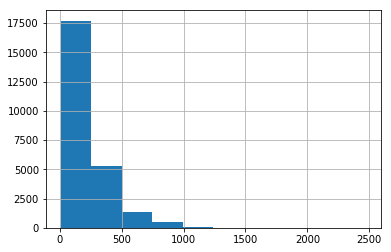

count    25000.000000
mean       232.868680
std        173.064467
min         10.000000
25%        127.000000
50%        174.000000
75%        283.000000
max       2469.000000
dtype: float64

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

In [31]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l>0 ]
lables = [ lables[i] for i, l in enumerate(reviews_len) if l> 0 ]

In [32]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [33]:
print (pad_features(reviews_int,230))

[[    0     0     0 ...     9    10   208]
 [67106    42 67107 ...     1 11338   972]
 [    0     0     0 ...     6   182   408]
 ...
 [    8   213 11638 ...   333     3    32]
 [  492    94     9 ...   274 66380  1270]
 [    0     0     0 ...    11     6  1360]]


In [34]:
features=pad_features(reviews_int,230)

In [35]:
split_frac = 0.8
len_feat=25000
train_x = features[0:int(split_frac*len_feat)]
train_y = lables[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = lables[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

In [36]:
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(np.asarray(train_x)), torch.from_numpy(np.asarray(train_y)))
valid_data = TensorDataset(torch.from_numpy(np.asarray(valid_x)), torch.from_numpy(np.asarray(valid_y)))
test_data = TensorDataset(torch.from_numpy(np.asarray(test_x)), torch.from_numpy(np.asarray(test_y)))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [37]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 230])
Sample input: 
 tensor([[    0,     0,     0,  ...,    74,    49,  2220],
        [11958,     6,     1,  ...,   311,    64,   572],
        [   46,    18,    13,  ...,    41,   176,     3],
        ...,
        [    0,     0,     0,  ...,    53,     3,  3886],
        [    0,     0,     0,  ...,    36,    33,  7581],
        [ 1182,  6915,   442,  ...,  2679,  2083,     4]], dtype=torch.int32)

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.],
       dtype=torch.float64)


In [38]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [39]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embedding): Embedding(143195, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [40]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)


# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping


net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1


        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.LongTensor)
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])


                inputs = inputs.type(torch.LongTensor)
                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.747966... Val Loss: 0.898713
Epoch: 1/4... Step: 200... Loss: 0.676138... Val Loss: 1.096531
Epoch: 1/4... Step: 300... Loss: 0.607080... Val Loss: 0.993021
Epoch: 1/4... Step: 400... Loss: 0.525899... Val Loss: 0.722734
Epoch: 2/4... Step: 500... Loss: 0.531896... Val Loss: 1.076365
Epoch: 2/4... Step: 600... Loss: 0.310591... Val Loss: 0.774999
Epoch: 2/4... Step: 700... Loss: 0.404066... Val Loss: 0.521415
Epoch: 2/4... Step: 800... Loss: 0.374486... Val Loss: 0.780790
Epoch: 3/4... Step: 900... Loss: 0.356571... Val Loss: 0.552586
Epoch: 3/4... Step: 1000... Loss: 0.357092... Val Loss: 0.461959
Epoch: 3/4... Step: 1100... Loss: 0.387630... Val Loss: 0.510263
Epoch: 3/4... Step: 1200... Loss: 0.210130... Val Loss: 0.343339
Epoch: 4/4... Step: 1300... Loss: 0.140996... Val Loss: 0.387313
Epoch: 4/4... Step: 1400... Loss: 0.135890... Val Loss: 0.856683
Epoch: 4/4... Step: 1500... Loss: 0.160076... Val Loss: 0.657436
Epoch: 4/4... Step: 1600... Loss: 

In [43]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    
    
    # get predicted outputs
    inputs = inputs.type(torch.LongTensor)
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())  
    np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.517
Test accuracy: 0.824


In [57]:
from string import punctuation

def tokenize_review(test_review):
    test_review = test_review.lower() # lowercase
    # get rid of punctuation
    test_text = ''.join([c for c in test_review if c not in punctuation])

    # splitting by spaces
    test_words = test_text.split()

    # tokens
    test_ints = []
    test_ints.append([vocab_to_int[word] for word in test_words])

    return test_ints

# test code and generate tokenized review
test_ints = tokenize_review(test_review)
print(test_ints)


# test sequence padding
seq_length=200
features = pad_features(test_ints, seq_length)

print(features)


# test conversion to tensor and pass into your model
feature_tensor = torch.from_numpy(features)
print(feature_tensor.size())


def predict(net, test_review, sequence_length=230):
    
    net.eval()
    
    # tokenize review
    test_ints = tokenize_review(test_review)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    
    
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(np.asarray(features))
    feature_tensor= torch.tensor(feature_tensor).to(torch.int64)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = net.init_hidden(batch_size)
    
    
    
    # get the output from the model
    output, h = net(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if(pred.item()==1):
        print("Positive review detected!")
    else:
        print("Negative review detected.")

[[11, 18, 61, 1, 124, 115, 3, 1, 424, 13, 40, 48, 148, 472, 10]]
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0  11  18  61   1 124 115   3   1 424  13  40  48 148
  472  10]]
torch.Size([1, 200])


In [58]:
test_review = 'This movie had the best acting and the dialogue was so good. I loved it.'
seq_length=230 # good to use the length that was trained on
predict(net, test_review, seq_length)

C:\Users\RAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


Prediction value, pre-rounding: 0.997264
Positive review detected!
